# Matplotlib
## <a href="#0">0 Preamble: A note about Jupyter notebooks</a>
## <a href="#I">I Matplotlib</a>
## <a href="#II">II General Matplotlib Tips</a>
### <a href="#II.1">II.1 Importing Matplotlib</a>
### <a href="#II.2">II.2 Setting Styles</a>
### <a href="#II.3">II.3 How to Display Your Plots</a>
#### <a href="#II.3.1">II.3.1 Plotting from a script</a>
#### <a href="#II.3.2">II.3.2 Plotting from an Jupyter shell</a>
#### <a href="#II.3.3">II.3.3 Plotting from an Jupyter notebook</a>
### <a href="#II.4">II.4 Matplotlib offers two interfaces</a>
#### <a href="#II.4.1">II.4.1 MATLAB-style Interface</a>
#### <a href="#II.4.2">II.4.2 Object-oriented interface</a>
## <a href="#III">III The component hierarchy in matplotlib</a>
### <a href="#III.1">III.1 Everybody is an Artist!</a>
### <a href="#III.2">III.2 Figure</a>
#### <a href="#III.2.1">III.2.1 Setting the Figure size</a>
#### <a href="#III.2.2">III.2.2 When using many figures</a>
### <a href="#III.3">III.3 Axes</a>
### <a href="#III.4">III.4 Subplots</a>
### <a href="#III.5">III.5 GridSpec</a>
## <a href="#IV">IV Simple Line Plots</a>
### <a href="#IV.1">IV.1 Line Colors and Styles</a>
### <a href="#IV.2">IV.2 Axes Limits</a>
### <a href="#IV.3">IV.3 Labeling Plots</a>
## <a href="#V">V Scatter Plots</a>
### <a href="#V.1">V.1 Scatter plots with plot()</a>
### <a href="#V.2">V.2 Scatter plots with scatter()</a>
### <a href="#V.3">V.3 Color maps</a>
#### <a href="#V.3.1">V.3.1 Customizing Colorbars and images</a>
#### <a href="#V.3.2">V.3.2 Discrete Color Bars</a>
## <a href="#VI">VI Visualizing Errors</a>
### <a href="#VI.1">VI.1 Basic Errorbars</a>
## <a href="#VII">VII Bar Charts and Pie Charts</a>
### <a href="#VII.1">VII.1 Bar Charts</a>
### <a href="#VII.2">VII.2 Pie Charts</a>
## <a href="#VIII">VIII Customizing Plot Legends</a>
### <a href="#VIII.1">VIII.1 Choosing Elements for the Legend</a>
## <a href="#IX">IX Histograms</a>
### <a href="#IX.1">IX.1 Stacked Bars</a>
### <a href="#IX.2">IX.2 Two-Dimensional Histograms</a>
#### <a href="#IX.2.1">IX.2.1 Hexagonal binnings</a>
## <a href="#X">X Box Plots and Violin Plots</a>
### <a href="#X.1">X.1 Box Plots</a>
### <a href="#X.2">X.2 Violin Plots</a>
## <a href="#XI">XI Contour Plots</a>
### <a href="#XI.1">XI.1 Visualizing a bivariate Function</a>
#### <a href="#XI.1.1">XI.1.1 meshgrid()</a>
### <a href="#XI.2">XI.2 Filled contour</a>
### <a href="#XI.3">XI.3 Using images</a>
## <a href="#XII">XII Text and Annotation</a>
### <a href="#XII.1">XII.1 Text</a>
### <a href="#XII.2">XII.2 Arrows and Annotation</a>
## <a href="#XIII">XIII Saving plots</a>
## <a href="#XIV">XIV Configurations and Stylesheets</a>
### <a href="#XIV.1">XIV.1 Changing the Defaults: rcParams</a>
### <a href="#XIV.2">XIV.2 Stylesheets</a>
### <a href="#XIV.3">XIV.3 The default style</a>

<a id="0"></a>
## 0 Preamble: A note about Jupyter notebooks

By finishing a Jupyter cell with the name of a variable or unassigned output of a statement, Jupyter will display that variable without the need for a print statement. This is especially useful when dealing with Pandas DataFrames, as the output is neatly formatted into a table.


You can modify the __ast_note_interactivity__ kernel option to make Jupyter do this for any variable or statement on it’s own line, so you can see the value of multiple statements at once: place this code in a Jupyter cell:

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'

If you want to set this behaviour for all instances of Jupyter, simply create a file __~/.ipython/profile_default/ipython_config.py__ with the lines below:


<pre>
c = get_config()

c.InteractiveShell.ast_node_interactivity = "all"
</pre>

__Note__: with the default mode "last', you can put a semicolon (;) at the end of the last command to suppress its output.


<a id="I"></a>
## I Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.<br>
One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.<br>

In recent years, however, the interface and style of Matplotlib have begun to show their age. 
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see Customizing Matplotlib: Configurations and Style Sheets), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, __Seaborn__, __ggpy__, __Altair__, and even __Pandas__ itself can be used as wrappers around Matplotlib's API. <br>

Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output: Matplotlib remains a vital piece of the data visualization stack, even if the community gradually moves away from using the Matplotlib API directly.<br>

<a id="II"></a>
## II General Matplotlib Tips

<a id="II.1"></a>
### II.1 Importing Matplotlib

Just as we use the __np__ shorthand for __NumPy__ and the __pd__ shorthand for Pandas, we will use some standard shorthands for Matplotlib imports.

The __plt__ shorthand is what we will use most often.


In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

<a id="II.2"></a>
### II.2 Setting Styles

We can use the __plt.style__ directive to choose appropriate aesthetic styles for our figures. <br>
Here we will set the classic style, which ensures that the plots we create use the __'classic'__ Matplotlib style:

In [19]:
plt.style.use('classic')
%matplotlib inline

<a id="II.3"></a>
### II.3 How to Display Your Plots

The way you can display your Matplotlib plots depends on the context; roughly, the three applicable contexts are using Matplotlib:
1. in a script, 
2. in an Jupyter terminal, 
3. in an Jupyter notebook.

<a id="II.3.1"></a>
#### II.3.1 Plotting from a script

If you are using Matplotlib from within a script, the function __plt.show()__ must be invoked to display your plots. <br>
__plt.show()__ starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

One thing to be aware of: the _plt.show()_ command should be used only once per Python session, and is most often seen at the very end of the script. Multiple _show()_ commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

<a id="II.3.2"></a>
#### II.3.2 Plotting from an Jupyter shell

It can be very convenient to use Matplotlib interactively within an Jupyter (IPython) shell. Jupyter is built to work well with Matplotlib if you specify Matplotlib mode. To enable this mode, you can use the __%matplotlib__ magic command after starting Jupyter.
Using *plt.show()*, here, is not required.

Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use __plt.draw()__. 

<a id="II.3.3"></a>
#### II.3.3 Plotting from an Jupyter notebook

The Jupyter notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an Jupyter notebook can be done with the __%matplotlib__ "magic" command, and works in a similar way to the Jupyter shell. In the Jupyter notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

__%matplotlib notebook__ will lead to interactive plots embedded within the notebook<br>
__%matplotlib inline__ will lead to static images of your plot embedded in the notebook

Using *plt.show()*, here, is not required.

After running the command __%matplotlib inline__ (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic.

Recent versions of Jupyter use __%matplotlib inline__ implicitely by default.

<a id="II.4"></a>
### II.4 Matplotlib offers two interfaces

Matplotlib offers a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. <br>

<a id="II.4.1"></a>
#### II.4.1 MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the __pyplot__ (__plt__) module.

 
The MATLAB-style interface is stateful: it keeps track of the "current" figure and axes, which are where all __plt__ commands are applied. <br>
You can get a reference to these using the __plt.gcf()__ (get current figure) and __plt.gca()__ (get current axes) routines.

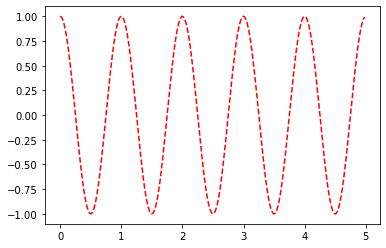

In [10]:
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211) # <=> Axes
plt.plot(t1, f(t1), 'bo') 

plt.subplot(212)

plt.plot(t2, f(t2), 'k')

plt.figure(2)
plt.subplot(111)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--');

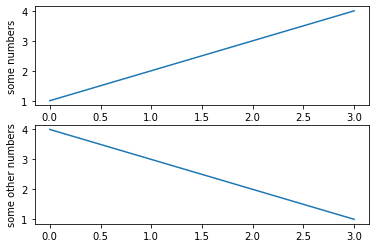

In [5]:
plt.figure() # create a figure which becomes the default figure
plt.subplot(2, 1, 1) # create a new subplot associated with the default figure, this
                     # subplot becomes the default Axes
plt.plot([1, 2, 3, 4]) # plot data on the default Axes
plt.ylabel('some numbers'); # set the y label of the default Axes
plt.subplot(2, 1, 2) # create a new subplot associated with the default figure, this
                     # subplot becomes the new default Axes
plt.plot([4, 3, 2, 1]) # plot data on the new default Axes
plt.ylabel('some other numbers'); # set the y label of the default Axes

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second subplot is created, how can we go back and add something to the first? <br>
This is possible with the MATLAB-style interface, but a bit clunky. 

<a id="II.4.2"></a>
#### II.4.2 Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. <br>
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. 
<br>
To re-create the previous plot using this style of plotting, you might do the following:


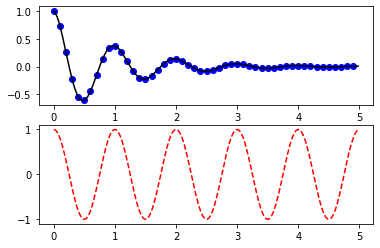

In [11]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig=plt.figure(1)
ax1=fig.add_subplot(211)

ax2=fig.add_subplot(212)
ax2.plot(t2, np.cos(2*np.pi*t2), 'r--')
ax1.plot(t1, f(t1), 'bo', t2, f(t2), 'k');

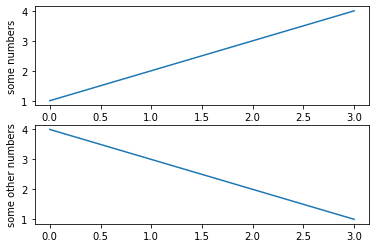

In [9]:
fig=plt.figure() 
ax1=fig.add_subplot(2, 1, 1) 
ax2=fig.add_subplot(2, 1, 2)
ax1.plot([1, 2, 3, 4]) # plot data on ax1
ax1.set_ylabel('some numbers'); # set the y label of ax1
ax2.plot([4, 3, 2, 1]) # plot data on ax2
ax2.set_ylabel('some other numbers'); # set the y label of ax2

One advantage of using this method is that it allows users to easily handle multiple figures/axes without getting confused as to which one is currently active:

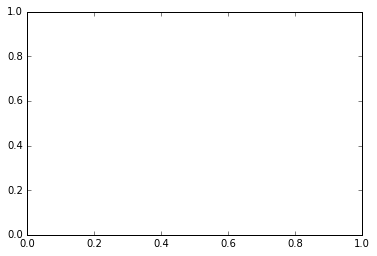

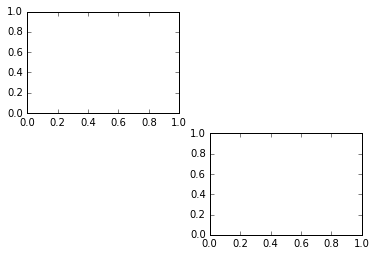

In [22]:
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(2, 2, 1)
ax3 = fig2.add_subplot(2, 2, 4);

For simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. <br>
Throughout this notebook, we will be using the object-oriented interfaces.


<a id="III"></a>
## III The component hierarchy in matplotlib

In the small examples seen above, we've already noticed that matplotlib has a hierarchical structure consisting usually of something called a __Figure__ itself composed of one or more __Axes__ (or __SubPlots__, a special kind of Axes).
The __Axes__ are themselves composed of differents components: __Axis__, __Ticks__, __Line2D__, __Text__, ...


<img src="nbimages/figureandaxes.png" alt="Figures and Axes" title="Figures and Axes" width=500 height=500 />

<a id="III.1"></a>
### III.1 Everybody is an Artist !

From lines and points which represent data to minor ticks and text labels for them on X axis, every single component in a figure is an __Artist__ object (technically speaking, Artists draw your data on a canvas in matplotlib).

There are two types of Artists: primitives and containers. 

<img src="nbimages/artists.png" alt="Artists" title="Artists" width=600 height=400 />

The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Tick, Axis, Axes and Figure).

__Note__: containers usually do contain sub-containers: a Figure is composed of one or more Axes, Axes are usually composed of 2 Axis, ...

The standard use is to create a __Figure__ instance, use the __Figure__ to create one or more __Axes__ (or __Subplot__ instances), and use the __Axes__ instance helper methods to create the primitives.


__Note__: an Artist, container or primitive, cannot be contained in multiple containers.


<a id="III.2"></a>
### III.2 Figure

The most basic element of a matplotlib plot is the __figure__. The figure object should be considered as your frame. Imagine any visualization as a potential collage of graphs and the figure as the place where all those graphs are pasted and moved around.
The figure by itself is an empty structure waiting for content. 
In matplotlib, we create the figure object using the following statement:

__plt.figure()__ 

Optionally (but this is usually recommended), we can store the figure object in some variable in case we needed to use it later. 

You can create multiple figure if needed.



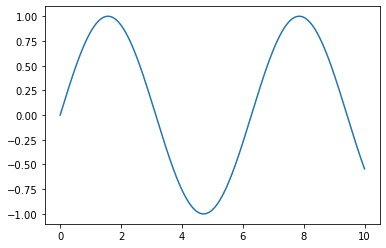

In [11]:
time = np.linspace(0, 10, 1000)
height = np.sin(time)
# Plotting directly:
# in fact here a default figure and a default axes are automatically created and 
# used, the plt.gcf() and plt.gca() functions return a reference to them (if needed)
plt.plot(time, height)
plt.show();

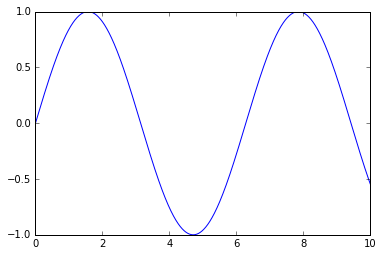

In [26]:
time = np.linspace(0, 10, 1000)
height = np.sin(time)
# Here the Figure and Axes are created explicitly
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(time, height);

<a id="III.2.1"></a>
#### III.2.1 Setting the Figure size
The figure size can be specified via the __figsize__ argument (_figsize_ is a tuple of two values, the width and height of the figure in inches).

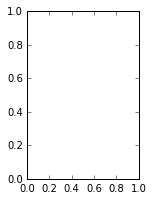

In [27]:
fig = plt.figure(figsize=(2,3))
ax1 = fig.add_subplot(1, 1, 1)

<a id="III.2.2"></a>
#### III.2.2 When using many figures

One needs to be aware that Matplotlib always keeps a reference to open figures.<br>
In the following situation:

*fig = plt.figure()<br>
ax = fig.add_subplot(1, 1, 1)<br>
fig = plt.figure()<br>
ax = fig.add_subplot(1, 1, 1)<br>*

one would normally expect (in Python terms) that when the second figure is created, 
there are no longer references to the original figure, and the memory should be freed, 
but this is not the case. <br>
Matplotlib keeps an internal reference to all figures unless specifically instructed 
to close a figure. Therefore, when making many plots, users may run out of memory. <br>
The solution is to explicitly close figures when they are no longer used via the __plt.close()__ function:


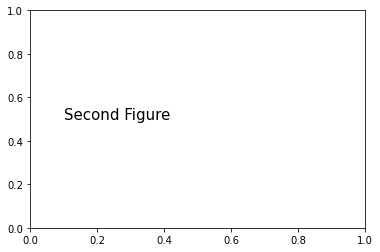

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.1, 0.5, r'First Figure', fontsize=15)
plt.close(fig)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.1, 0.5, r'Second Figure', fontsize=15);

<a id="III.3"></a>
### III.3 Axes

While the __figure__ object is your plotting frame, the canvas on which you will be drawing is the __axes__ object.<br> 

The __Axes__ is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the __Axes__ is the plotting area into which most of the objects go, and the __Axes__ has many special helper methods (__plot()__, __text()__, __hist()__, __imshow()__, ...) to create the most common graphics primitives (__Line2D__, __Text__, __Rectangle__, __Image__, respectively).

The __Axes__ also has helper methods (__set_xlabel()__, __set_ylabel()__) to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

<img src="nbimages/axes_elements.png" alt="Axes elements" title="Axes elements" width=500 height=500 />

By themselves, _axes_ are free-floating: they can be put in any position on a figure.<br>

The method __add_axes([left, bottom, width, height])__ is used to add a new axes to a figure. the argument denoting the lower left point of the new axes in figure coordinates (x0,y0) and its width and height.<br>
The x0, y0, width and height are values between 0 and 1 (they represent fractions of figure width and height, 1 means 100% of the figure size).<br>

__add_axes()__ returns the actual axes object onto which we can plot.<br>

The axes objects offer several method to plot data: __plot()__, __scatter()__, __hist()__, ...


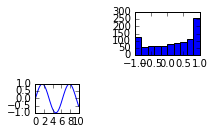

In [28]:
# Original plot
fig = plt.figure()
# Adding 2 new axes the the figure
ax1=fig.add_axes([0.43, 0.6, 0.15, 0.15])  #[lowerCorner_x, lowerCorner_y, width, height]
ax2=fig.add_axes([0.2, 0.4, 0.1, 0.1])     #[lowerCorner_x, lowerCorner_y, width, height]
ax1.hist(height)
ax2.plot(time, height);

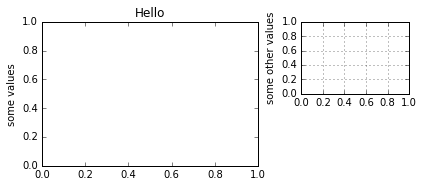

In [29]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,0.5,0.5])
ax1.set_ylabel('some values')
ax2 = fig.add_axes([0.6,0.25,0.25,0.25])
ax2.grid(True)
ax2.set_ylabel('some other values')
ax1.set_title("Hello");

<a id="III.4"></a>
### III.4 Subplots

A subplot is a special kind of axes.<br> 
In a nutshell, subplots are simply a way to organize your free floating axes into a rigid grid.<br> 
You can imagine that subplots creates a grid, and each individual cell of the grid is a new axes for you to fill with data.<br>

The __subplots()__ methods creates a grid (you do provide as arguments the number of rows and columns).<br>
The method returns all the individual axes (stored in __axes__).

__Note__: __plt.tight_layout()__ is normally used when using subplots to make sure the axis ticks and labels don’t overlap across subplots.

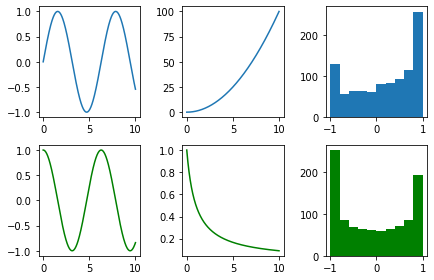

In [13]:
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)

# Plotting all the subplots
fig = plt.figure()
axes = fig.subplots(2, 3)
axes[0, 0].plot(time, height)
axes[0, 1].plot(time, time**2)
axes[0, 2].hist(height)
axes[1, 0].plot(time, weight, 'g')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')
plt.tight_layout();

If you are only interested in, let say, 3 cells in the grid, you can use __add_subplot()__ instead of __subplots()__.
The calling signature of __add_subplot()__ allows to specify where the axes should be situated according to a grid.
The usual and easiest way to specify this position is the 3 integer notation:<br>

__fig.add_subplot(2, 3, 1)__ # 2 rows, 3 cols, first cell<br>
    or<br>
__fig.add_subplot(231)__ # 2 rows, 3 cols, first cell<br>
    

Each call to __add_subplot()__ returns a single subplot.<br>

__Note__: _add_subplot(111)_ is equivalent to _add_subplot()_ and produces only a single axes.

__Note__: the position of the Axes can also be adjusted using __pyplot.subplots_adjust(...)__ or __pyplot.tight_layout()__.

In most cases, _add_subplot()_ would be the prefered method to create axes for plots on a canvas.<br> Only in cases where exact positioning matters, _add_axes()_ might be useful.


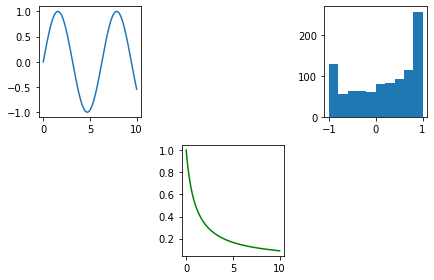

In [19]:
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)

# Plotting all the subplots
fig = plt.figure()
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 5)
ax1.plot(time, height)
ax2.hist(height)
ax3.plot(time, 1/(time+1), color='green')
plt.tight_layout();

<a id="III.5"></a>
### III.5 GridSpec

The __gridspec__ modules provides the __GridSpec__ class which gives more control over the placement of subplots. <br>
The way GridSpec works is that, as with subplots, one defines a grid. However, instead of automatically associating an axes to each cell of the grid, one can select how many cells each individual plotting area will occupy. So if we wanted a plot to occupy twice the area of another plot, we could associate it to twice the number of cells in the grid.

With a GridSpec it is also much easier to control the margins of the plots and the spacing between the individual subplots. <br>

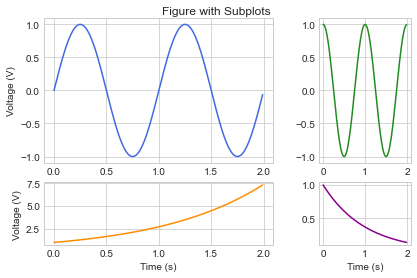

In [43]:
from matplotlib.gridspec import  GridSpec

# Make some data
t = np.arange(0, 2, 0.01)
y1 = np.sin(2*np.pi * t)
y2 = np.cos(2*np.pi * t)
y3 = np.exp(t)
y4 = np.exp(-t)

# Initialize the grid with 3 rows and 3 columns
ncols = 3
nrows = 3
grid = GridSpec(nrows, ncols,
                left=0.1, bottom=0.15, right=0.95, top=0.94, wspace=0.5, hspace=0.3)

fig = plt.figure()
# fig.clf() # if needed, clear the entire figure

# Add axes which can span multiple grid boxes
ax1 = fig.add_subplot(grid[0:2, 0:2])
ax2 = fig.add_subplot(grid[0:2, 2])
ax3 = fig.add_subplot(grid[2, 0:2])
ax4 = fig.add_subplot(grid[2, 2])

ax1.plot(t, y1, color='royalblue')
ax2.plot(t, y2, color='forestgreen')
ax3.plot(t, y3, color='darkorange')
ax4.plot(t, y4, color='darkmagenta')

# Add labels and titles
fig.suptitle('Figure with Subplots')
ax1.set_ylabel('Voltage (V)')
ax3.set_ylabel('Voltage (V)')
ax3.set_xlabel('Time (s)')
ax4.set_xlabel('Time (s)');

<a id="IV"></a>
## IV Simple Line Plots

For all Matplotlib plots, we start by creating a figure and an axes.
To plot a simple function __y = f(x)__ we can use the __plot()__ method of the axes object.
__plot()__ plots y versus x (x and y are arrays or lists of numbers) as lines and/or markers.

Call signatures:

**plot([x], y, [fmt], ..., **kwargs)**<br>
**plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)**

The coordinates of the points or line nodes are given by __x__, __y__.
The optional parameter __fmt__ is a convenient way for defining basic formatting like color, marker and linestyle. <br>
If only 1 list of number is provided, it is considered as being the ordinate of points, and their corresponding abscissas are auto-generated starting at 0.<br>
e.g. plot([4,5,8]) <=> plot([0,1,2],[4,5,8])<br>

If several pair of x's and y's are provided, each pair correspond to a new line or a new set of markers.


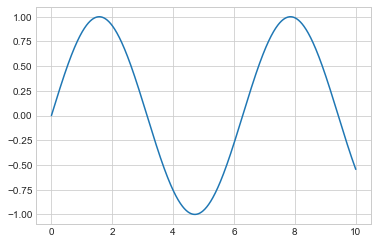

In [21]:
# The following directive is not needed anymore with recent versions of Jupyter

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid') # or 'classic', 'bmh', 'ggplot', 'seaborn', ...

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the __plot()__ method multiple times, or provide it with multiples x's, y's list or arrays. 

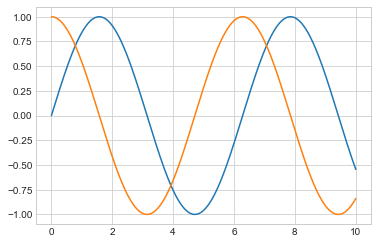

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

<a id="IV.1"></a>
### IV.1 Line Colors and Styles

The axes __plot()__ method takes the __color__ keyword argument to specify the color of the line. The color is given as a string argument and it can be specified in a variety of ways.<br>
__Note__: if no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

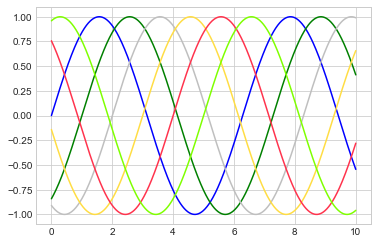

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x - 0), color='blue')        # specify color by name
ax.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
ax.plot(x, np.sin(x - 5), color='chartreuse');  # HTML color names 

The axes __plot()__ method takes the __linestyle__ keyword argument to specify the visual aspect of the line. The line style is given as a string argument and it can be specified in a variety of ways:

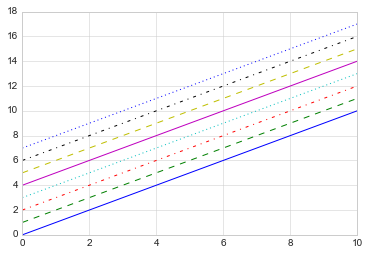

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes:
ax.plot(x, x + 4, linestyle='-')  # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':');  # dotted

__Note__: linestyle and color codes can be combined into a single non-keyword argument:


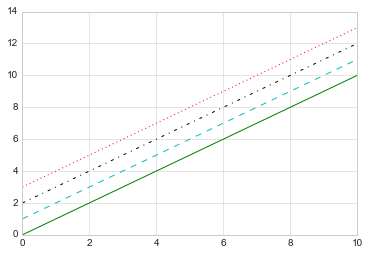

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, x + 0, '-g')  # solid green
ax.plot(x, x + 1, '--c') # dashed cyan
ax.plot(x, x + 2, '-.k') # dashdot black
ax.plot(x, x + 3, ':r');  # dotted red

<a id="IV.2"></a>
### IV.2 Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but you can adjust axis limits using the __set_xlim()__ and __set_ylim()__ methods (or the __xlim()__ and __ylim()__ functions).<br>
__Note__: if you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments.<br>

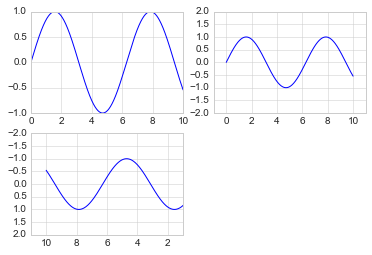

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

x = np.linspace(0, 10, 1000)
ax1.plot(x, np.sin(x))
 
ax2.plot(x, np.sin(x))
ax2.set_xlim(-1, 11)
ax2.set_ylim(-2, 2)

ax3.plot(x, np.sin(x))
ax3.set_xlim(11, 1)
ax3.set_ylim(2, -2);


The method __axis()__ allows you to set the x and y limits with a single call, by passing a list which specifies _[xmin, xmax, ymin, ymax]_.<br>
The __axis()__ method goes even beyond this, allowing you to automatically tighten the bounds around the current plot (parameter __'tight'__) or ensuring an equal aspect ratio so that on your screen, one unit in x is equal to one unit in y (parameter __'equal'__):


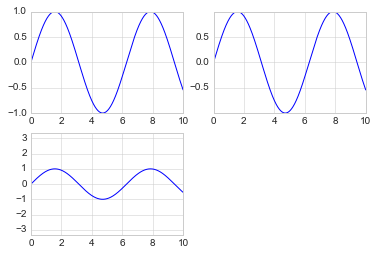

In [87]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
x = np.linspace(0, 10, 1000)
ax1.plot(x, np.sin(x))
ax2.axis([-1, 11, -1.5, 1.5])
ax2.plot(x, np.sin(x))
ax2.axis('tight')
ax3.plot(x, np.sin(x))
ax3.axis('equal');

<a id="IV.3"></a>
### IV.3 Labeling Plots

We can label plots with the help of titles, axis labels, and legends.

The Axes methods __set_title()__, __set_xlabel()__, __set_ylabel()__ can be used to set quickly the titles and axis label. The position, size, and style of these labels can be adjusted using optional arguments.
The easiest to specify the legend of each line is by using the __label__ keyword argument of the _plot()_ method and then invoke the axes __legend()__ method.


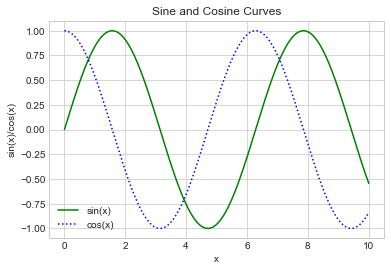

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.set_title("Sine and Cosine Curves")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)/cos(x)");
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')

ax.legend();

__Note__: rather than calling the __set_XXX()__ methods individually, it is often more convenient to use the axes __set()__ method to set all these properties at once:

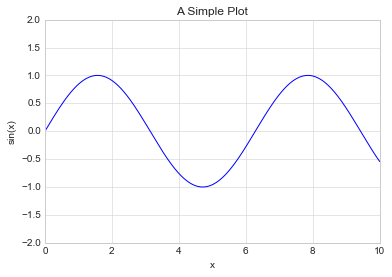

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

<a id="V"></a>
## V Scatter Plots

<a id="V.1"></a>
### V.1 Scatter plots with plot()

The __plot()__ method can be used to produce line plots as well as __scatter plots__.<br>
To produce a scatter plot, instead of the line style or color, the third argument in the function call should represent the type of symbol used for the plotting of points. 
To control the visual aspects of the points, the following symbols can be used: 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', ...

__Note__: these character codes can be used together with line style and color codes to plot points along with a line connecting them and a specific color. 

__Note__: additional keyword arguments can be used to specify a wide range of properties of the lines and markers: __color__, __markersize__, __linewidth__, __markerfacecolor__, __markeredgecolor__, __markeredgewidth__, ...).

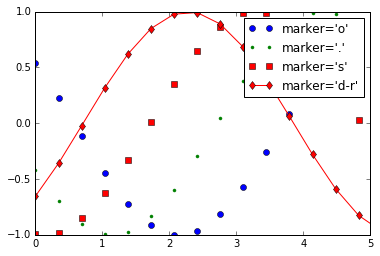

In [20]:
x=np.linspace(0, 10, 30)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(x, np.cos(x+1), 'o',label="marker='o'")
ax.plot(x, np.cos(x+2), '.',label="marker='.'")
ax.plot(x, np.cos(x+3), 's',label="marker='s'")
ax.plot(x, np.cos(x+4), 'd-r',label="marker='d-r'")

plt.legend()
plt.xlim([0,5]);

<a id="V.2"></a>
### V.2 Scatter plots with scatter()

A second way of creating scatter plots is the __scatter()__ method, which can be used very similarly to the _plot()_ method.<br>
The main difference between _scatter()_ and _plot()_ is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled. Thank to that, the color and size of points, for instance, can be used to convey information about what is being displayed.<br>

__Note__: the color argument is automatically mapped to a color scale (shown here by the __colorbar()__ command).<br>

__Note__: the size argument is given in pixels. <br>

__Note__: as datasets get larger than a few thousand points, _plot()_ can be noticeably more efficient than _scatter()_. 

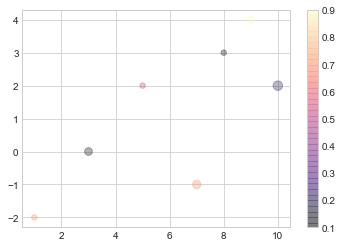

In [26]:
x = [1,3,5,7,8,9,10]
y = [-2,0,2,-1,3,4,2]
colors = [0.7,0.1,0.5,0.7,0.1,0.9,0.2]
sizes = [30,60,30,70,30,60,90]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

r=ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='magma')
plt.colorbar(r, ax=ax);  # show color scale



<a id="V.3"></a>
### V.3 Color maps

<a id="V.3.1"></a>
#### V.3.1 Customizing Colorbars and images

The colormap of __ColorBars__, __Images__,  ... can be specified using the __cmap__ argument of the plotting function used (__colorbar()__, __imshow()__, ...).<br>
The available colormaps are in the __plt.cm__ package, using Jupyter's tab-completion will give you a full list of built-in colormaps.<br>

Broadly, there are three different categories of colormaps:

1. Sequential colormaps: these are made up of one continuous sequence of colors : binary, viridis (the default with recent version of matplotlib), cubehelix, ...
2. Divergent colormaps: these usually contain two distinct colors, which show positive and negative deviations from a mean: RdBu (Red-Blue) , PuOr (Purple-Orange), ...
3. Qualitative colormaps: these mix colors with no particular sequence: rainbow, jet, ...

<a id="V.3.2"></a>
#### V.3.2 Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values. The easiest way to do this is to use the __plt.cm.get_cmap()__ function, and pass the name of a suitable colormap along with the number of desired bins:

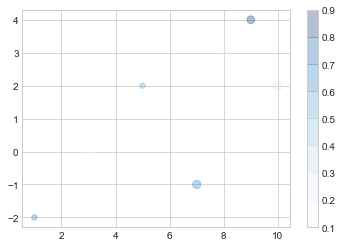

In [27]:
x = [1,3,5,7,8,9,10]
y = [-2,0,2,-1,3,4,2]
colors = [0.7,0.1,0.5,0.7,0.1,0.9,0.2]
sizes = [30,60,30,70,30,60,90]

fig=plt.figure()
axe=fig.add_subplot(1,1,1)

cmap=plt.cm.get_cmap('Blues', 8)

r=axe.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap=cmap)
plt.colorbar(r, ax=axe);  # show color scale


<a id="VI"></a>
## VI Visualizing Errors

Matplotlib line plots (and scatter plots) can include error bars. Error bars show the confidence or precision in a set of measurements or calculated values.

<a id="VI.1"></a>
### VI.1 Basic Errorbars

Error bars can also be added to line plots with the help of the Axes method __errorbar()__.<br> 
The two positional arguments supplied to _errorbar()_ are the lists or arrays of x, y data points. <br>
The two keyword arguments __xerr=__ and __yerr=__ define the error bar lengths in the x and y directions.<br>
The keyword arguments __fmt=__ can be used to control the formatting of the errors bar (color, line style, ...).<br>


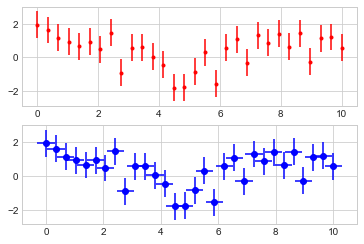

In [28]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
x = np.linspace(0, 10, 30)
dx = 0.3
dy = 0.8
y = np.sin(x) + dy * np.random.randn(30)
ax1.errorbar(x, y, yerr=dy, fmt='.r');
ax2.errorbar(x, y, yerr=dy, xerr=dx, fmt='ob');

<a id="VII"></a>
## VII Bar Charts and Pie Charts

<a id="VII.1"></a>
### VII.1 Bar Charts

Bar plot are constructed with the help of the Axes __bar()__ method.<br>
The __bar()__ method requires two positional arguments: a list of bar positions and a list of bar heights. <br><br>
__Note__: to create a horizontal bar chart you can use the __barh()__ method.


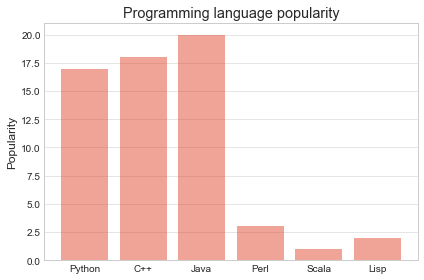

In [30]:
languages = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(languages))
popularity = [17,18,20,3,1,2]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.bar(y_pos, popularity, align='center', alpha=0.5)
ax.set_xticks(y_pos)
ax.set_xticklabels(languages)
ax.set_ylabel('Popularity')
ax.set_title('Programming language popularity')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.tight_layout();

Two or more bar charts can be displayed on the same Axes:


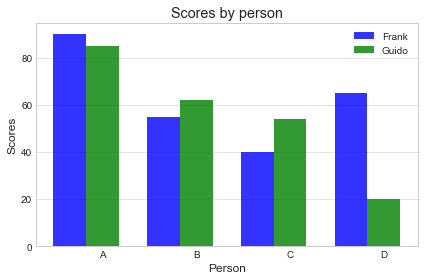

In [33]:
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, means_frank, bar_width,
            alpha=opacity, color='b', label='Frank')

rects2 = ax.bar(index + bar_width, means_guido, bar_width,
            alpha=opacity, color='g', label='Guido')
 
ax.set_xlabel('Person')
ax.set_ylabel('Scores')
ax.set_title('Scores by person')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('A', 'B', 'C', 'D'))
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.legend()
plt.tight_layout();

<a id="VII.2"></a>
### VII.2 Pie Charts

Pie charts can be constructed with Matplotlib's Axes __pie()__ method. <br>
The only required positional argument supplied to the __pie()__ method is a list of pie piece sizes.<br>

__Note__: __pie()__ returns a sequence of 2 or 3 elements:<br>
1. a list of Wedge instances.<br>
2. a list of the label associated with the wedges.<br>
3. a list of the numeric labels associated with the wedges (if autopct is not None).<br>

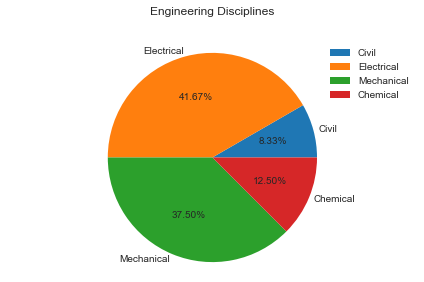

In [29]:
# Pie chart, where the slices will be plotted counter-clockwise:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [10, 50, 45, 15]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.pie(sizes, labels=labels, autopct='%1.2f%%',  labeldistance=1.05)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle (not an oval).
ax.set_title('Engineering Disciplines',  y=1.08)
plt.legend(loc="best")
plt.tight_layout();

Pie charts can be further customized with the help of several keyword arguments: <br>

__label=__ : a list of pie wedge labels <br>

__autopct=__ : indicates if the percentages will be auto-calculated and how it will be formated. A format string starting with a % can be specified or a function can be provided.<br>
%.1f will display percentage values with 1 digit after the decimal point.<br>
%.2f will display percentage values with 2 digits after the decimal point.<br>
%.2f%% will display percentage values with 2 digits after the decimal point and the % character.
...<br>

__explode=__: a wedge of a pie chart can be made to explode from the rest of the wedges of the pie chart using the __explode=__ keyword argument of the _pie()_ method.<br>
_explode=_ is a tuple where each element corresponds to a wedge of the pie chart.
The length of the tuple should be equal to the number of pies in the pie chart.<br>

__colors=__: the __colors=__ parameters is a tuple containing the list of colors to be cycled for the wedges of a pie-chart.<br>

__startangle=__: the __startangle=__ parameter rotates the pie chart by the specified number of degrees. The rotation is counter clock wise and performed on X Axis of the pie chart.<br>

__shadow=__: a shadow effect can be used using the __shadow=__ parameter. Passing True (the default is False) will make a shadow appear below the rim of the pie chart. <br>

__frame=__ : by setting the __frame=__ argument to True, the axes frame is drawn around the pie chart.<br>

__wedgeprop=__: the wedges of the pie chart can be further customized using the __wedgeprop=__ parameter. A python dictionary with the name value pairs describing the wedge properties like edgecolor and linewidth can be passed as the __wedgeprop=__ argument.<br>

__labeldistance=__, __pctdistance=__: we can change the position of labels (both outer and percent labels) by modifying __labeldistance=__(defaul:1) and __pctdistance=__(default:0.6).<br>


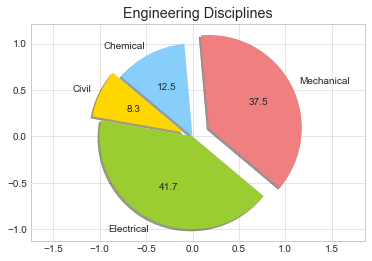

In [40]:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [10, 50, 45, 15]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0.2, 0)  # explode 1st slice


fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f', 
       shadow=True,  startangle=140, frame=True)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle (not an oval).
ax.set_title('Engineering Disciplines');

<a id="VIII"></a>
## VIII Customizing Plot Legends


The simplest legend can be created with the __plt.legend()__ function, which automatically creates a legend for any labeled plot elements.
There are many ways to customize a legend using different keyword arguments: 
__loc=__: to specify the location of the legend: 'best' (location with the minimum overlap with other drawn artists), 'upper left', 'upper right', 'center', ...<br>

__frameon=__: control whether the legend should be drawn on a frame (the default) or not.<br>

__ncol=__: specify the number of columns in the legend (default is 1)

__fancyboxrounded=__: use a rounded box instead of a rectangle<br>

__shadow=__: add a shadow<br>

__alpha=__:change the transparency (alpha value) of the frame<br>

__borderpad=__: change the padding around the text<br>

__title=__: set the title of the legend<br>

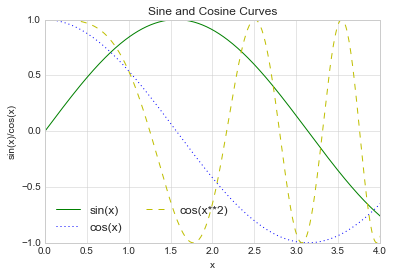

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.set_title("Sine and Cosine Curves")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)/cos(x)");
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.plot(x, np.cos(x**2), '--y', label='cos(x**2)')
ax.legend(loc='lower left', ncol=2, shadow=True)
ax.set_xlim([0,4]);

<a id="VIII.1"></a>
### VIII.1 Choosing Elements for the Legend

The legend, by default, includes __all__ labeled elements (the elements with a __label=__ attribute) . If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the _Axes_ objects. <br>
The __Axes__ objects contains a list (attribute __lines__) of created line instances. Passing any of these to _legend()_ will tell it which to identify, along with the labels we'd like to specify:

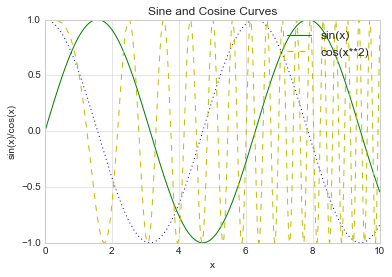

In [99]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 1000)
ax.set_title("Sine and Cosine Curves")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)/cos(x)");
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.plot(x, np.cos(x**2), '--y', label='cos(x**2)')
ax.legend([ax.lines[0], ax.lines[2]], [ax.lines[0].get_label(), ax.lines[2].get_label()]);

<a id="IX"></a>
## IX Histograms

A histogram is a type of bar plot that shows the frequency or number of values compared to a set of value ranges. The Axes __hist()__ method is used to build an histogram. <br>
The first argument passed to _hist()_ corresponds to the list or array of values to plot.<br> 
The second argument corresponds to the number of _bins_ (number of bars) on the histogram. 

__Note:__ the __np.random.normal()__ function creates an array of random numbers with a normal distribution.<br>
The 3 arguments passed to _np.random.normal()_ are the mean, the standard deviation and (__size=__) the length of the array.

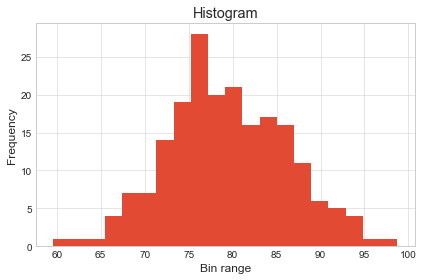

In [41]:
np.random.seed(3) # to generate each time the same random numbers
x = np.random.normal(80, 7, size=200)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(x, 20)
ax.set_title('Histogram')
ax.set_xlabel('Bin range')
ax.set_ylabel('Frequency')

fig.tight_layout();

The __hist()__ method has many options to tune both the calculation and the display:<br>

__density=__: normalizes bin heights so that the integral of the histogram is 1.<br>
__histype=__: type of histogram: bar, stacked, step or step-filled.<br>
__bins=__:	list of bin edges.<br>
__color=__:	bar color.<br>
__edgecolor=__:	bar edge color.<br>
__alpha=__:	bar opacity.<br>

Here's an example of a combination of more customized histograms:

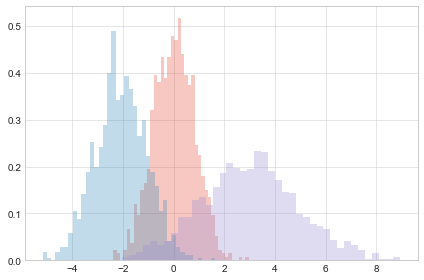

In [42]:
np.random.seed(3) # to generate each time the same random numbers
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(x1, **kwargs)
ax.hist(x2, **kwargs)
ax.hist(x3, **kwargs)

fig.tight_layout();


<a id="IX.1"></a>
### IX.1 Stacked Bars
By default, if we pass as first argument to _hit()_ a list of lists, matplotlib will put the bars side-by-side.<br>
Instead of plotting the bars side-by-side, we can stack them by passing in the parameter __stacked = True__ to the _hist()_ method:

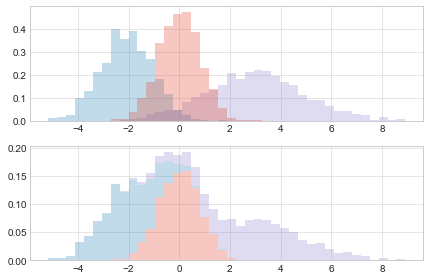

In [43]:

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)

ax1.hist([x1, x2, x3],  **kwargs)

ax1 = fig.add_subplot(2, 1, 2)

ax1.hist([x1, x2, x3], stacked=True, **kwargs)

fig.tight_layout();

<a id="IX.2"></a>
### IX.2 Two-Dimensional Histograms

Just as we create histograms in one dimension, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. <br>
The Axes __hist2d()__ method can be used to easily plot a two-dimensional histogram.<br>

__Note:__ : Just as _hist()_, _hist2d()_ has a number of options to fine-tune the plot and the binning.


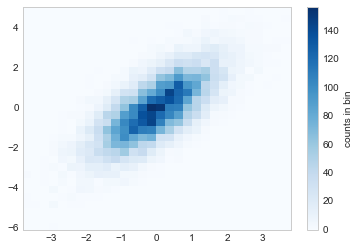

In [42]:
# Here we are defining an x and y array from a multivariate Gaussian distribution:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, 10000).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
counts, xedges, yedges, im=ax.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar(im)
cb.set_label('counts in bin')

<a id="IX.2.1"></a>
#### IX.2.1 Hexagonal binnings
The two-dimensional histogram creates a tesselation of squares across the axes. 
Another natural shape for such a tesselation is the regular hexagon. <br>
For this purpose, Matplotlib provides the Axes __hexbin()__ method, which will represents a two-dimensional dataset binned within a grid of hexagons

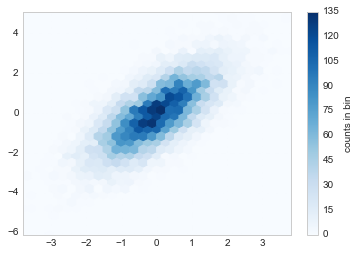

In [104]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, 10000).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
hb=ax.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(hb, ax=ax)
cb.set_label('counts in bin')

<a id="X"></a>
## X Box Plots and Violin Plots

In addition to histograms, a couple of other useful statistical plots are __box plots__ and __violin plots__.

<a id="X.1"></a>
### X.1 Box Plots
To create a box plot, the Axes __boxplot()__ method is used. The general syntax is:<br>
ax.boxplot(data)<br>
The data passed to the __boxplot()__ method can be a Python list or NumPy array. <br>
To create multiple box plots side by side, pass in a list of lists or a 2D NumPy array.<br>

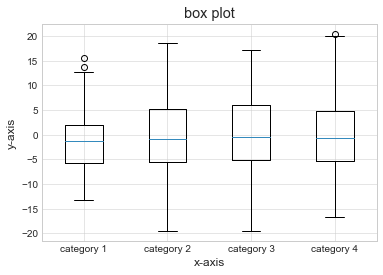

In [46]:
InteractiveShell.ast_node_interactivity = "last"
# generate some random data
data1 = np.random.normal(0, 6, 100)
data2 = np.random.normal(0, 7, 100)
data3 = np.random.normal(0, 8, 100)
data4 = np.random.normal(0, 9, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# build a box plot
ax.boxplot([data1, data2, data3, data4])
# title and axis labels
ax.set_title('box plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['category 1', 'category 2', 'category 3', 'category 4']
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(xticklabels)

# add horizontal grid lines
ax.yaxis.grid(True);

<a id="X.2"></a>
### X.2  Violin Plots

Violin plots are another type of statistical plot. A violin plot is similar to a box plot, but a violin plot shows some additional information: the sides of the "violins" in a violin plot corresponds to a kernel density estimation flipped vertically.

To create a violin plot you use Axes __violinplot()__ method. It takes a first argument similar to the one exepcted by __boxplot()__.
A couple of extra keyword arguments can be included: __showmeans=__ and __showmedians=__.

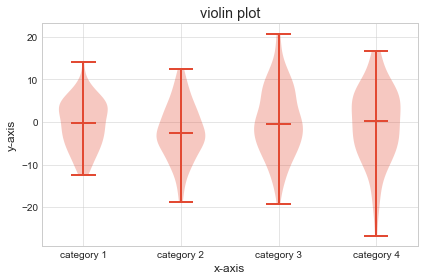

In [48]:
# generate some random data
data1 = np.random.normal(0, 6, 100)
data2 = np.random.normal(0, 7, 100)
data3 = np.random.normal(0, 8, 100)
data4 = np.random.normal(0, 9, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# build a box plot
ax.violinplot([data1, data2, data3, data4], showmeans=False, showmedians=True)
# title and axis labels
ax.set_title('violin plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['category 1', 'category 2', 'category 3', 'category 4']
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(xticklabels)

# add horizontal grid lines
ax.yaxis.grid(True)
fig.tight_layout();

<a id="XI"></a>
## XI Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three methods that can be helpful for this task: __contour()__ for contour plots, __contourf()__ for filled contour plots, and __imshow()__ for showing images.

In Civil Engineering a contour plot could show the topology of a building sight. <br>
In Mechanical Engineering a contour plot could show the stress gradient across part surface.<br>

<a id="XI.1"></a>
### XI.1 Visualizing a bivariate Function

A contour plot can be used to visualise a bi-variate function $z = f(x, y)$.
A contour plot can be created with the __contour()__ method. 
It takes three arguments: a grid of x values, a grid of y values, and a grid of z values.<br>
The x and y values represent positions on the plot, and the z values will be represented by the contour levels.<br>
A convenient way to prepare x and y is to use the __np.meshgrid()__ function, which 2 builds two-dimensional grids from 2 one-dimensional arrays.

<a id="XI.1.1"></a>
#### XI.1.1 meshgrid()

The purpose of __np.meshgrid()__  is to create a rectangular grid out of an array of x values and an array of y values. For example, if we want to create a grid where we have a point at each position between 0 and 4 in both the x and y directions we need a pair of coordinate for every combination of the x and y points (in this case 25 pairs are needed). __np.meshgrid()__ grid will help us generate the corresponding points coordinates:

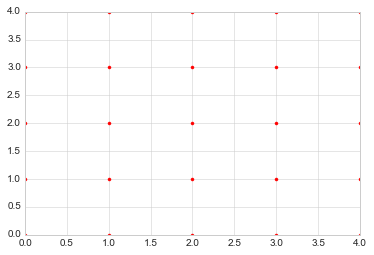

In [107]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])
xx, yy = np.meshgrid(xvalues, yvalues)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xx, yy, marker='.', color='r', linestyle='none');

The creation a rectangular grid is useful for a number of tasks. For instance, here it is a way to sample the bivariate function $f(x,y)$ over a range of values for x and y.


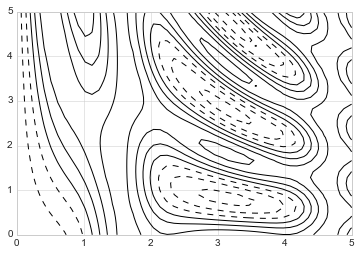

In [108]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, Z, colors='black');

__Note__: by default when a single color is used (__colors=__ keyword argument), negative values are represented by dashed lines, and positive values by solid lines. <br>
Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument (here the Red-Gray color map is used). 

Here, we'll also specify that we want more lines to be drawn (here 30 equally spaced intervals within the data range):

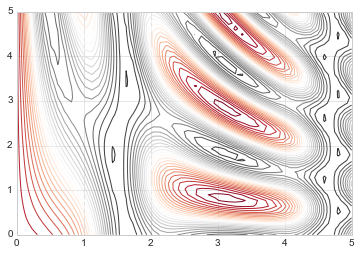

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, Z, 30, cmap='RdGy');

<a id="XI.2"></a>
### XI.2  Filled contour

We can switch to a filled contour plot using the __contourf(__) method, which uses largely the same syntax as _contour()_.

Additionally, we can set a colorbar with the help of the __plt.colorbar()__ function, which automatically creates an additional axis with labeled color information for the plot:

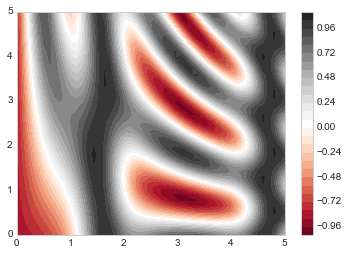

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Here the black regions are "peaks," while the red regions are "valleys."
c=ax.contourf(X, Y, Z, 30, cmap='RdGy')
plt.colorbar(c, ax=ax);

<a id="XI.3"></a>
### XI.3 Using images

A potential issue with this plot is that it is a bit "splotchy": the color steps are discrete rather than continuous. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot. A better way to handle this is to use the __imshow()__ method, which interprets a two-dimensional grid of data as an image.<br>

There are a few potential gotchas with __imshow()__, however:

_imshow()_ doesn't accept an x and y grid, so you must manually specify the __extent__ [xmin, xmax, ymin, ymax] of the image on the plot.<br>

_imshow()_  by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in contour plots. This must be changed when showing gridded data.<br>

_imshow()_ will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ax.axis(aspect='image') to make x and y units match.


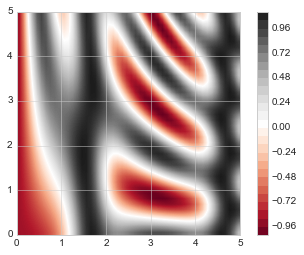

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
ax.axis(aspect='image');
plt.colorbar(c, ax=ax);

Finally, it can sometimes be useful to combine contour plots and image plots. <br>
For example, here we'll use a partially transparent background image (with transparency set via the __alpha__ parameter) and overplot contours with labels on the contours themselves (using the __clabel()__ method):


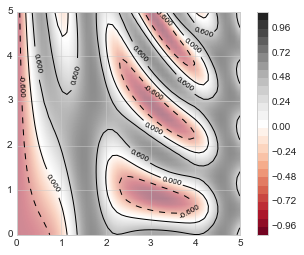

In [112]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


contours = ax.contour(X, Y, Z, 3, colors='black')
ax.clabel(contours, inline=True, fontsize=8)

ax.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
ax.axis(aspect='image');
plt.colorbar(c, ax=ax);

<a id="XII"></a>
## XII Text and Annotation

<a id="XII.1"></a>
### XII.1 Text

The most basic types of annotations you will use are axes labels and titles, but you can also add text where you want in the Axes with the help of the Axes __text()__ method.
<br>
The __text()__ method takes an x position, a y position, a string, and then optional keywords  arguments specifying the color, size, style, alignment, and other properties of the text. 

Usually, we anchor our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by setting the __transform__ keyword argument.

There are three pre-defined values that can be useful in this situation:

1. __ax.transData__: the usual data coordinates associated with the x- and y-axis labels.
2. __ax.transAxes__: the coordinates are relative to the bottom-left corner of the axes and given as a fraction of the axes size.
3. __fig.transFigure__: the coordinates are relative to the bottom-left corner of the figure and given as a fraction of the figure size.

__Note__: if we change the axes limits, it is only the __transData__ coordinates that will be affected, while the others remain stationary

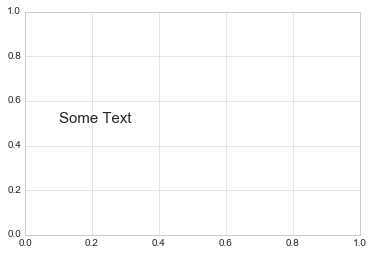

In [113]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.1, 0.5, r'Some Text', fontsize=15, transform=ax.transData);

<a id="XII.2"></a>
### XII.2 Arrows and Annotation

The __plt.annotate()__ function can also be used to create some text optionnaly associated with an arrow.

The arrow style is controlled through the __arrowprops=__ dictionary keyword argument, which has numerous options available.

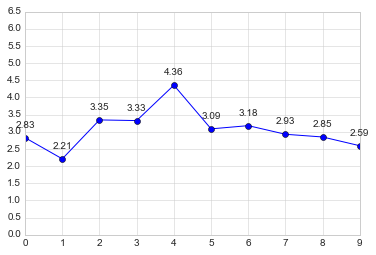

In [114]:
# using some dummy data for this example
xs = np.arange(0,10,1)
ys = np.random.normal(loc=3, scale=0.4, size=10)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 'bo-' means blue color, round points, solid lines
ax.plot(xs,ys,'bo-')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.set_xticks(np.arange(0,10,1))
ax.set_yticks(np.arange(0,7,0.5));

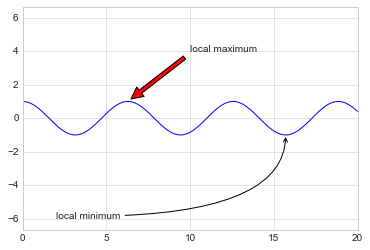

In [115]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

<a id="XIII"></a>
## XIII Saving plots

Matplotlib plots can be saved as image files using the __plt.savefig()__ function.

In Python script, the __plt.savefig()__ function needs to be called right above the __plt.show()__ statement (if this statement is used). All the features of the plot must be specified before the plot is saved as an image file. If _savefig()_ is invoked after the __plt.show()__ statement; the figure will not be saved until the plot window is closed. 

You can also invoke __plt.savefig()__ without calling the __plt.show()__ statement at all.

The only positional argument expected by __plt.savefig()__ is the name of the image file to create. 
Matplotlib infers the image file format (.png, .jpg, etc) based on the extension specified in the filename.

The list of supported file types can be found by using the following method of the figure canvas object:  __fig.canvas.get_supported_filetypes()__

The keyword argument __dpi=__ can be used to specify how many dots per inch (image resolution) are in the saved image. 

The keyword argument __bbox_inches=__ is optional. If the axis labels in the plot are cut off in the saved image, seting bbox_inches to 'tight' may help. 
You can also use this argument to control the size (in inches) of the saved image.

The following code section constructs a line plot and saves the plot to the image file plot.png.

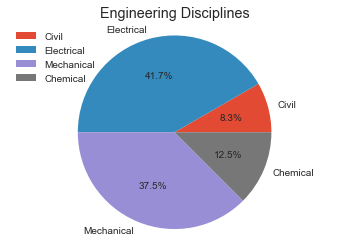

In [49]:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [10, 50, 45, 15]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle (not an oval).
ax.set_title('Engineering Disciplines')
plt.legend(loc="best")
plt.savefig("plot.png", dpi=300, bbox_inches='tight');

<a id="XIV"></a>
## XIV Configurations and Stylesheets

<a id="XIV.1"></a>
### XIV.1 Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a __runtime configuration__ (__rc__) containing the default styles for every plot element you create. <br>

This configuration can be adjusted at any time using the __plt.rc()__ convenience routine, for instance we could do something like this:


In [47]:
from cycler import cycler
colors = cycler('color',
                 ['#EE6666', '#3388BB', '#9988DD',
                  '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('patch', edgecolor='#E6E6E6' )

These settings can be saved in a __.matplotlibrc__ file.

__Note__: the __rcParams__ dictionary contains the current settings, it may be useful to create a copy of it, to easily reset the changes if needed:

**IPython_default = plt.rcParams.copy()**

We could then, if needed, reset our runtime configuration to the notebook default like that:

**plt.rcParams.update(IPython_default)**

<a id="XIV.2"></a>
### XIV.2 Stylesheets

Recent releases of Matplotlib have added a very convenient __style__ module, which includes a number of stylesheets, as well as the ability to create and package your own styles.<br>

These stylesheets are formatted similarly to the __.matplotlibrc__ files mentioned earlier, but must be named with a __.mplstyle__ extension

The basic way to switch to a stylesheet is to call:

__plt.style.use('stylename')__

This will change the style for the rest of the session.

Alternatively, you can use the style context manager, which sets a style temporarily:

**with plt.style.context('stylename'):
    make_a_plot()**

Even if you don't create your own style, the stylesheets included by default are extremely useful. The available styles are listed in __plt.style.available__.

Many different stylesheets do exist today, here are some popular ones: 

__seaborn-deep__, __seaborn-pastel__, __seaborn-white__, ..<br>
This is a set of styles from the Seaborn project (a complement to Matplotlib), providing additional features and improving the default matplotlib aesthetics.  

__dark_background__<br>
The __dark_background__ style is the standard matplotlib one with colours changed for high contrast.

__bmh__<br>
This style comes from Bayesian Methods for Hackers book, it particularly suits scientific graphing by showing the precision of the plot.

__ggplot__<br>
This style comes from the plotting system of the same name for the R language: it takes on a lot of contemporary lessons on presenting data, focusing on simplicity.

__fivethirtyeight__<br>
This style emulates the look and feel of the famous data journalist Nate Silver's site fivethirtyeight.com.

<a id="XIV.3"></a>
### XIV.3  Default style

The style used by default today in Matplotlib is named __'default'__.

To switch to the former default style of matplotlib 1.x you can use the __'classic'__ style sheet:


In [1]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M